In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from datetime import datetime

# Get Rodrigo's data set, recorded at ICTP
total = pd.read_csv('/Users/markon/ITU/DATA/temp.csv') 
total.index = pd.DatetimeIndex(total['created_at'])

# Just use two years 
df=total[datetime(2014, 1, 1, 0, 0, 0):datetime(2016, 12, 31, 23, 59, 59)]

# and use only data points at every hour
df=df.resample('H').median()

# Prophet requires the independent variable called "ds"
df['ds'] = df.index

# and the dependent variable called "y"
df['y'] = df['Temperature']



In [2]:
# Create a Prophet model, fit to the data
model=Prophet(yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False )
model.fit(df)


/Users/markon/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [3]:
# Set the prediction period to 7 days = 7*24 houra
future=model.make_future_dataframe(periods=7*24,freq='H')
future.tail()

,ds
26467,2017-01-07 19:00:00
26468,2017-01-07 20:00:00
26469,2017-01-07 21:00:00
26470,2017-01-07 22:00:00
26471,2017-01-07 23:00:00


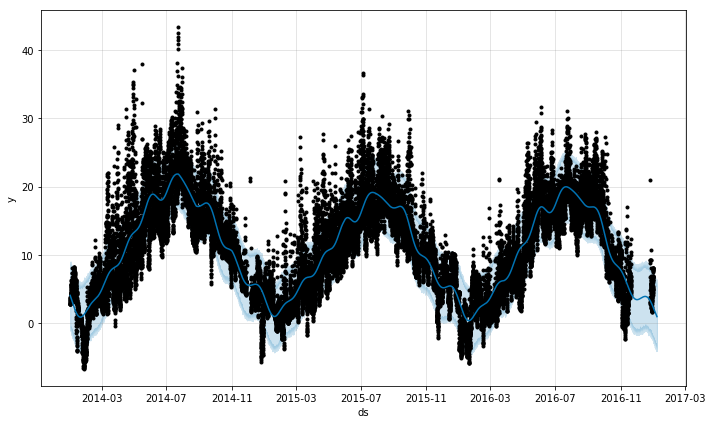

In [4]:
forecast=model.predict(future)
model.plot(forecast)

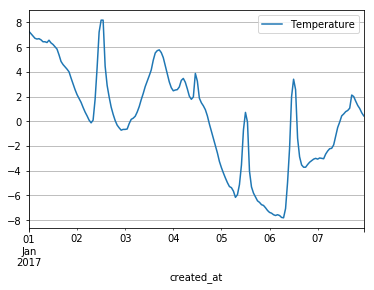

In [5]:
%matplotlib inline
tmp=total[datetime(2016, 12, 31, 23, 59, 59):datetime(2017, 1, 7, 23, 59, 59)]
tmp=tmp.resample('H').median()
tmp.plot(grid=True)

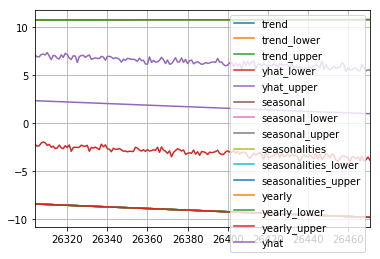

In [6]:
forecast[-7*24:].plot(grid=True)

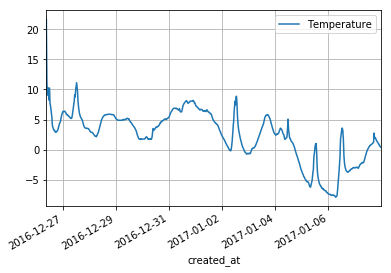

In [8]:
total[datetime(2016, 12, 31-7, 23, 59, 59):datetime(2017, 1, 7, 23, 59, 59)].plot(grid=True)